In [1]:
# importing pandas package
import pandas as pd

# making data frame from csv file
data = pd.read_csv("C:/Users/ANU PRIYA/Desktop/nanum/detail.csv")

# generating one row
row1 = data.sample(n = 1)

# display
row1


# importing pandas package
import pandas as pd

# making data frame from csv file
data = pd.read_csv("C:/Users/ANU PRIYA/Desktop/nanum/detail.csv")

# generating one row
rows = data.sample(frac =.25)

# checking if sample is 0.25 times data or not

if (0.25*(len(data))== len(rows)):

    print(len(data), len(rows))

# display
rows

C:\Users\ANU PRIYA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Record Index     Status JumpTo Cycle Step Cur(mA) Voltage(V)  \
260229       260229   CCCV_Chg     62    13   51   870.5     4.1207   
215961       215961   CCCV_Chg     52    11   43   594.4     4.1992   
156037       156037  CCCV_DChg     39     8   33  -870.1     3.6904   
55858         55859   CCCV_Chg     17     4   15   689.7     4.1995   
279459       279459   CCCV_Chg     67    14   55   870.5     3.9229   
...             ...        ...    ...   ...  ...     ...        ...   
182727       182727  CCCV_DChg     44     9   37  -870.1     3.4663   
190422       190422   CCCV_Chg     47    10   39   870.5     4.0265   
221114       221114  CCCV_DChg     54    11   45  -869.7      3.895   
279018       279018   CCCV_Chg     67    14   55   870.5      3.909   
35987         35988       Rest     13     3   12       0     4.1874   

       CapaCity(mAh) Energy(mWh) Relative Time(h:min:s.ms)  \
260229       1881.96     7352.61               2:09:39.000   
215961       2188.01     8630.36               2:32:01.000   
156037       1287.79     4960.72               1:28:49.000   
55858        2160.08     8517.31               2:29:19.000   
279459       1017.39     3890.59               1:10:09.000   
...              ...         ...                       ...   
182727       2221.23     8333.33               2:33:11.000   
190422       1548.52     5996.95               1:46:41.000   
221114         470.3     1873.82               0:32:26.000   
279018       910.802      3473.2               1:02:48.000   
35987              0           0               0:03:11.000   

              Absolute Time  
260229  10-13-2020 20.19.42  
215961  10-13-2020 08.02.05  
156037  10-12-2020 15.23.35  
55858   10-11-2020 11.34.20  
279459  10-14-2020 01.40.06  
...                     ...  
182727  10-12-2020 22.48.19  
190422  10-13-2020 00.56.30  
221114  10-13-2020 09.27.57  
279018  10-14-2020 01.32.45  
35987   10-11-2020 06.03.13  

[104170 rows x 11 columns]

In [3]:
import csv
# name of csv file 
filename = "C:/Users/ANU PRIYA/Desktop/nanum/detailsampled.csv"
    
# writing to csv file 
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
    
    # writing the data rows 
    csvwriter.writerows(rows)

Order of the Filter= 9
Cut-off frequency= 0.226 rad/s 


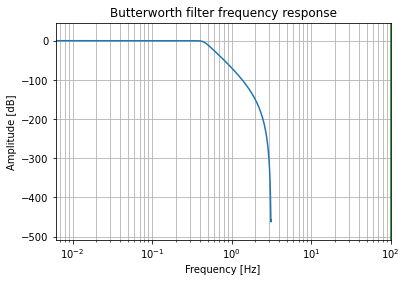

In [4]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math
# Specifications of Filter

# sampling frequency
f_sample = 40000

# pass band frequency
f_pass = 4000

# stop band frequency
f_stop = 8000

# pass band ripple
fs = 0.5

# pass band freq in radian
wp = f_pass/(f_sample/2)

# stop band freq in radian
ws = f_stop/(f_sample/2)

# Sampling Time
Td = 1

# pass band ripple
g_pass = 0.5

# stop band attenuation
g_stop = 40

# Conversion to prewrapped analog frequency
omega_p = (2/Td)*np.tan(wp/2)
omega_s = (2/Td)*np.tan(ws/2)


# Design of Filter using signal.buttord function
N, Wn = signal.buttord(omega_p, omega_s, g_pass, g_stop, analog=True)


# Printing the values of order & cut-off frequency!
print("Order of the Filter=", N) # N is the order
# Wn is the cut-off freq of the filter
print("Cut-off frequency= {:.3f} rad/s ".format(Wn))


# Conversion in Z-domain

# b is the numerator of the filter & a is the denominator
b, a = signal.butter(N, Wn, 'low', True)
z, p = signal.bilinear(b, a, fs)
# w is the freq in z-domain & h is the magnitude in z-domain
w, h = signal.freqz(z, p, 512)

# Magnitude Response
plt.semilogx(w, 20*np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green')
plt.show()
